In [1]:
%matplotlib inline
# importamos la triada de Data Science
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# importamos scipy.stats que ayudará a generar distribuciones
import scipy.stats as stats
# importamos seaborn, siguiendo la convención de renombrarlo como sns
import seaborn as sns
# archivo con funciones de visualización
import lec4_graphs as gfx
# evitar warnings y deprecaciones
import warnings
warnings.filterwarnings(action="ignore")
plt.style.use('seaborn') # gráficos estilo seaborn
plt.rcParams['figure.figsize']=(8,6)

# 1. Evaluar juicios de hipótesis (2 puntos): para evaluar la pertinencia de diversas hipótesis, se te solicita discernir si es posible rechazar la hipótesis nula.

● 75 individuos elegidos al azar fueron alcanzados por activistas pro-LGTB que se
identificaron como homosexuales, y 75 alcanzados por activistas pro-LGTB que se
identificaron como heterosexuales. El objetivo era medir actitudes frente a la
adopción homoparental. La organización encargada de procesar los datos obtuvo
los siguientes resultados:
    ○ El 67% de los encuestados por heterosexuales se mostró a favor de la
    adopción homoparental, mientras que un 72% de los encuestados por
    activistas que se identificaron como homosexuales se mostraron a favor
    de la adopción homoparental.
    ○ Asumiendo que la hipótesis nula es que ambos porcentajes no son
    diferentes, y la hipótesis alternativa es que existe una diferencia
    substancial entre ambos.
    ○ Con p-valor de 0.1183 ¿es posible rechazar la hipótesis nula en favor de la
    alternativa con una confianza de 95%?, ¿Cuanta es la confianza máxima
    con la que sería posible rechazar la hipótesis nula en favor de la alternativa
    con estos resultados?

# Con un 95% de confianza, el valor de z es 1.96 y un pvalor de 0.025. Bajo esto, el p-valor del ejercicio esta dentro de la nula, por lo cual se acepta la hipotesis nula.

# 2. Importar la base de datos utilizada la sesión presencial anterior (2 puntos):

● Agregue una serie de variables binarias por cada continente de la variable
region.
Tip: Utilice np.where para ello.
● De manera similar a la sesión anterior, enfóquese en las siguientes variables:
○ Apellidos desde la A hasta la N: Enfocarse en las variables chldmort,
adfert y life.
○ Apellidos desde la N hasta la Z: Enfocarse en las variables femlab,
literacy y school.

In [2]:
df=pd.read_csv('nations.csv', index_col=0, encoding='iso-8859-1')

In [3]:
def binarizar (dataframe, columna):
    valor_columna = dataframe[columna].unique()
    for vc in valor_columna:
        dataframe[vc]=np.where(dataframe[columna]==vc,1,0)

In [4]:
binarizar(df,'region')

In [5]:
df.sample(10)

,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini,Africa,Americas,Asia,Europe,Oceania
161,Malta,Europe,21871.199219,9.833333,17.299999,7.00,78.849998,413100,94.183334,0.4676,92.400002,23.350000,NaN,0,0,0,1,0
152,Hungary,Europe,17476.199219,10.883333,16.500000,7.00,73.699997,10033583,67.183334,0.7304,99.400002,21.200001,31.200001,0,0,0,1,0
191,Solomon Islands,Oceania,2249.199951,4.500000,70.300003,36.00,66.500000,503617,17.766666,0.4858,NaN,1.400000,NaN,0,0,0,0,1
3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.200000,NaN,1,0,0,0,0
134,Uzbekistan,Asia,2295.600098,10.000000,13.800000,40.25,67.550003,26674950,36.400002,0.8224,99.300003,15.600000,NaN,0,0,1,0,0
29,Malawi,Africa,660.400024,3.816667,119.199997,120.25,51.316666,13825916,18.549999,0.9520,73.699997,0.300000,NaN,1,0,0,0,0
121,Philippines,Asia,3118.199951,8.733334,54.099998,34.00,67.916664,89408720,48.450001,0.6184,95.400002,3.100000,44.000000,0,0,1,0,0
38,Rwanda,Africa,954.000000,3.050000,38.700001,122.50,53.849998,9882167,18.183332,1.0156,70.699997,0.300000,53.099998,1,0,0,0,0
49,Tunisia,Africa,7032.000000,6.066667,5.700000,21.75,73.916664,10192267,66.300003,0.3568,77.599998,8.300000,NaN,1,0,0,0,0
12,Congo (Dem Rep),Africa,279.799988,3.416667,201.399994,199.00,47.516666,61654348,33.633331,0.6552,66.800003,0.100000,44.400002,1,0,0,0,0


# 3.Implementar una función de prueba de hipótesis a mano (3 puntos):
    ● La función debe ingresar los siguientes argumentos:
        ○ df: La tabla de datos.
        ○ variable: La variable a analizar.
        ○ binarize: El indicador binario a utilizar.

In [6]:
def hipotesis_a_mano(dataframe,variable,binarize):
    df_bin_1 = dataframe[dataframe[binarize]==1]
    df_bin_0 = dataframe[dataframe[binarize]==0]
    prueba=stats.ttest_ind(df_bin_1[variable].dropna(),df_bin_0[variable].dropna())
    media_1=(df_bin_1[variable].mean())
    media_0=(df_bin_0[variable].mean())
    valor_t=prueba[0]
    valor_p=prueba[1]
    dif_medias=media_0-media_1
    print ('Variable', variable, 'con binarización ',binarize)
    print ('Media 0: ',media_0,', Media 1: ',media_1)
    print ('Valor Diferencia Medias: ',dif_medias)
    print ('Valor t: ',valor_t,' ,Valor p: ',valor_p)

In [7]:
variables_apellido= ['chldmort','adfert','life']
regiones=df['region'].unique()

In [8]:
regiones

array(['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'], dtype=object)

In [9]:
for x in variables_apellido:
    for cont in regiones:
        hipotesis_a_mano(df,x,cont)

Variable chldmort con binarización  Africa
Media 0:  24.74822695035461 , Media 1:  109.75
Valor Diferencia Medias:  -85.0017730496454
Valor t:  14.17367667788517  ,Valor p:  1.244572684496239e-31
Variable chldmort con binarización  Americas
Media 0:  53.052215189873415 , Media 1:  23.264285714285716
Valor Diferencia Medias:  29.7879294755877
Valor t:  -3.08561941878294  ,Valor p:  0.00233300081092071
Variable chldmort con binarización  Asia
Media 0:  51.141379310344824 , Media 1:  37.104166666666664
Valor Diferencia Medias:  14.03721264367816
Valor t:  -1.602738386676471  ,Valor p:  0.1106448646711535
Variable chldmort con binarización  Europe
Media 0:  59.29 , Media 1:  7.046511627906977
Valor Diferencia Medias:  52.243488372093026
Valor t:  -6.262400472976766  ,Valor p:  2.4506589890929246e-09
Variable chldmort con binarización  Oceania
Media 0:  48.34410112359551 , Media 1:  39.416666666666664
Valor Diferencia Medias:  8.927434456928843
Valor t:  -0.6277779742677246  ,Valor p:  0.53

# 4. Implementar una función que grafique los histogramas para ambas muestras (3 puntos)
    ● Genere una función que devuelva un gráfico donde visualice los dos histogramas cuando la variable es 1 y 0, respectivamente
    ● Para las tres variables de interés acorde a su grupo, analice las diferencias de medias por cada continente, y 
    posteriormente grafique. Concluya con los principales resultados al respecto.

In [51]:
def binarize_histogram_plt(dataframe, variable, binarize):
    plt.figure(figsize=(12,8))
    tmp = dataframe
    
    hist_1 = tmp[tmp[binarize] == 1][variable].dropna()
    hist_0 = tmp[tmp[binarize] == 0][variable].dropna()
    
    ax1=plt.subplot(1, 2, 1)
    ax1.hist(hist_0, color='lightgrey', label="Grafico", alpha=.5)
    ax1.axvline(np.mean(hist_0))
    plt.title("{0} <= {1}".format(variable, round(np.mean(tmp[variable]), 3)))
    
    ax2=plt.subplot(1, 2, 2)
    ax2.hist(hist_1,color='lightgrey',label="Grafico", alpha=.5)
    ax2.axvline(np.mean(hist_1))
    plt.title("{0} >= {1}".format(variable, round(np.mean(tmp[variable]), 3)))
    plt.show()

Gráfico de Varibale:  chldmort y Continente:  Africa


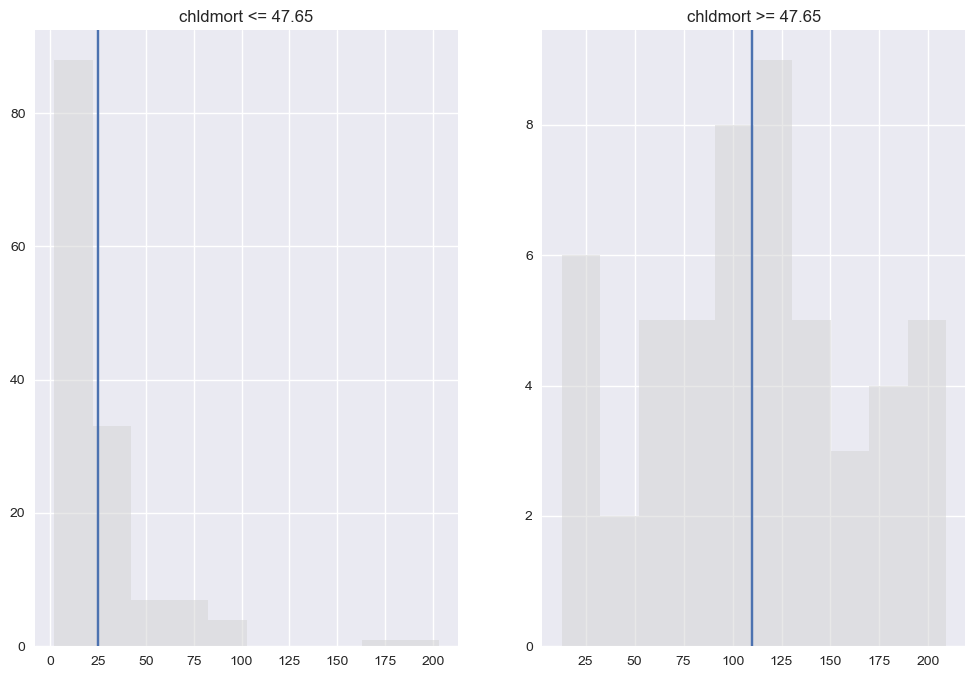


Gráfico de Varibale:  chldmort y Continente:  Americas


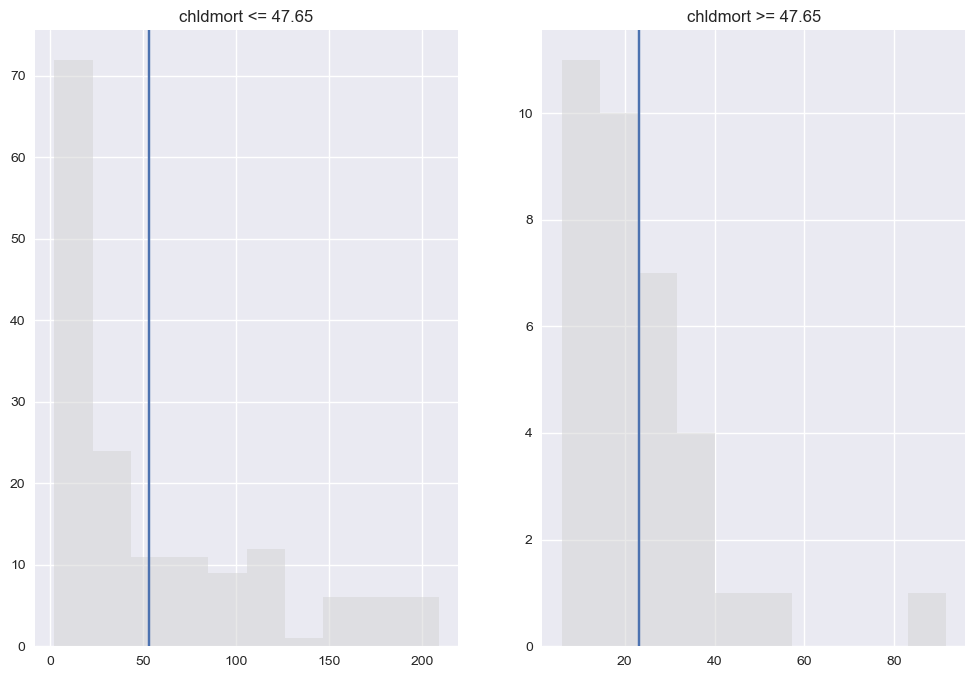


Gráfico de Varibale:  chldmort y Continente:  Asia


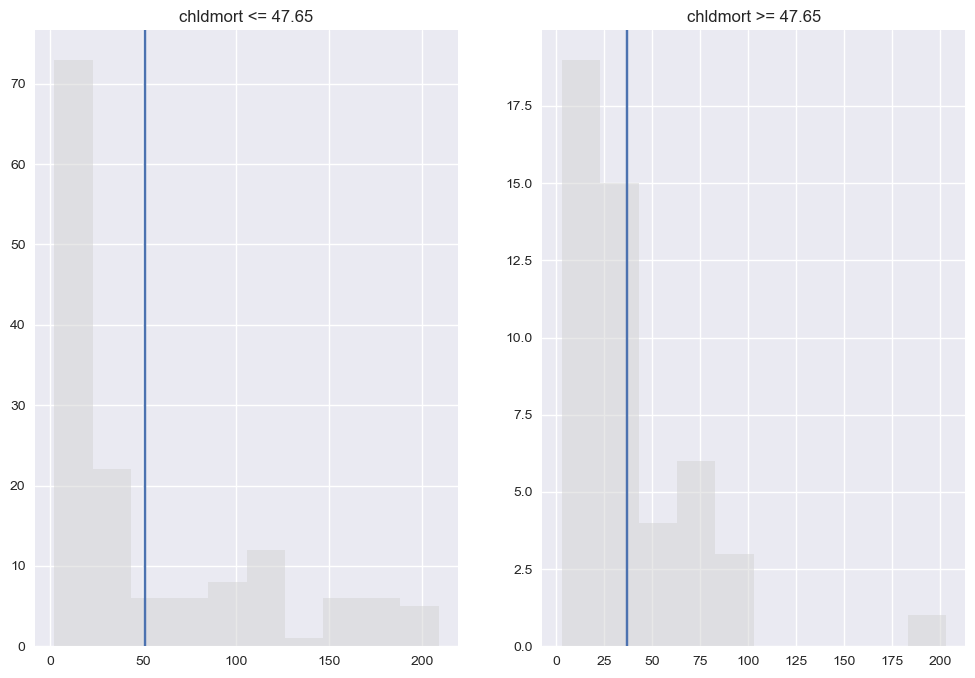


Gráfico de Varibale:  chldmort y Continente:  Europe


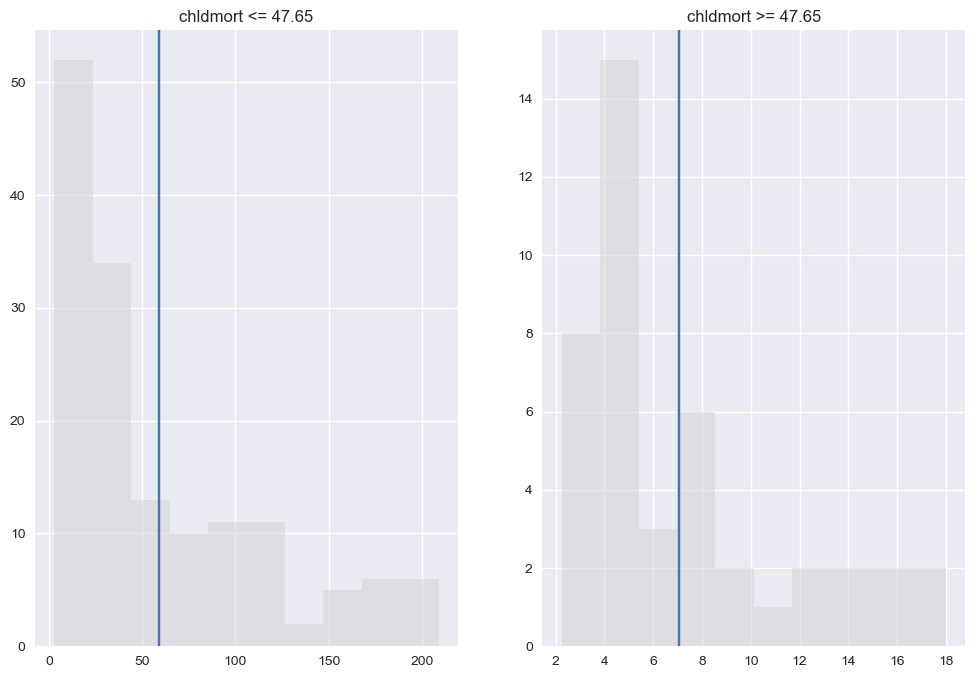


Gráfico de Varibale:  chldmort y Continente:  Oceania


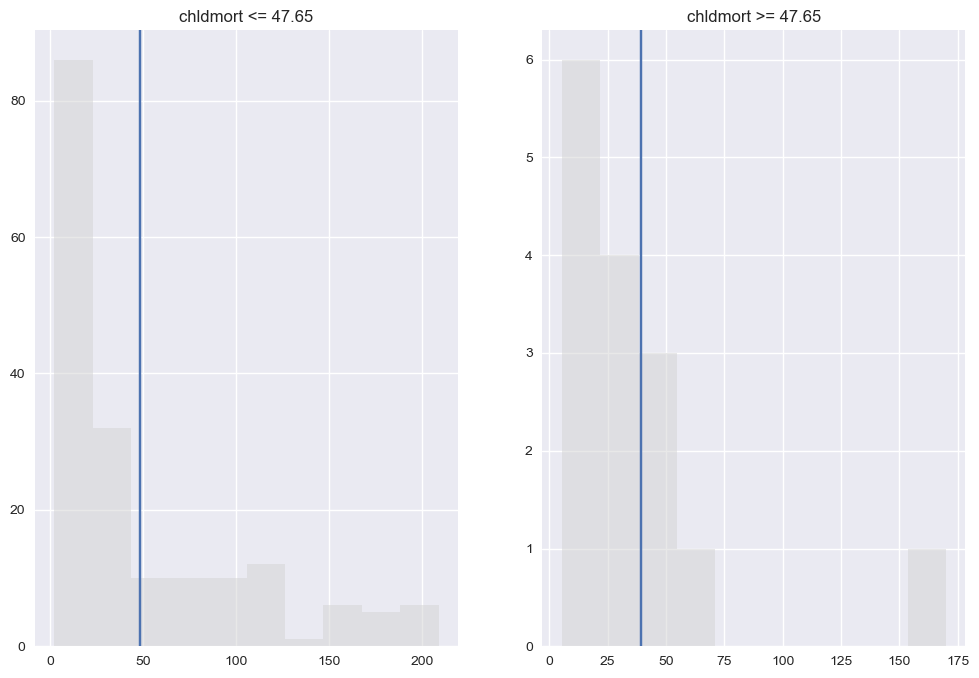


Gráfico de Varibale:  adfert y Continente:  Africa


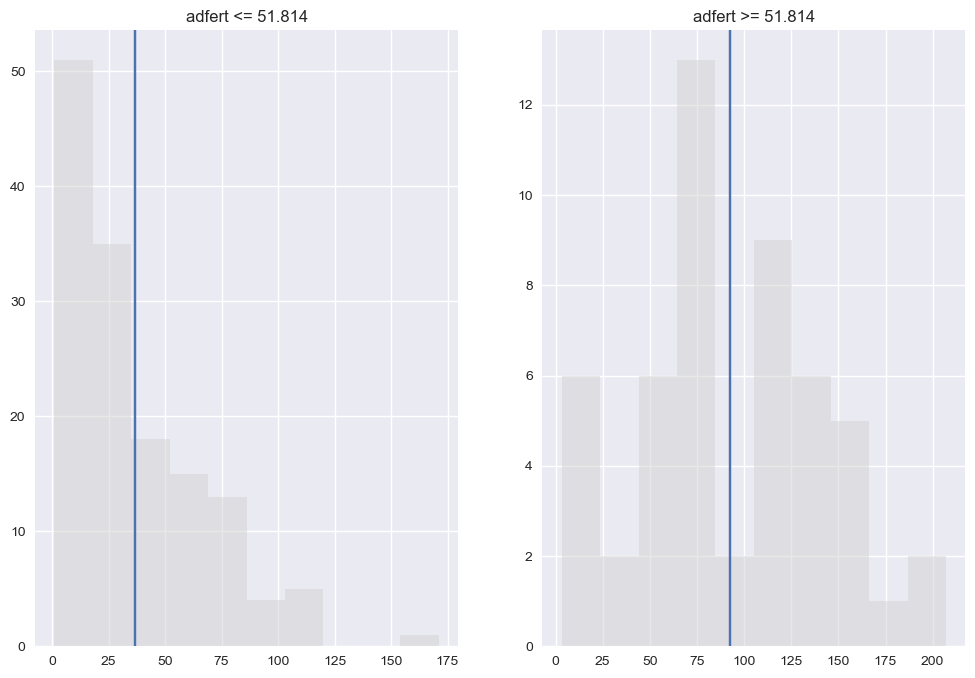


Gráfico de Varibale:  adfert y Continente:  Americas


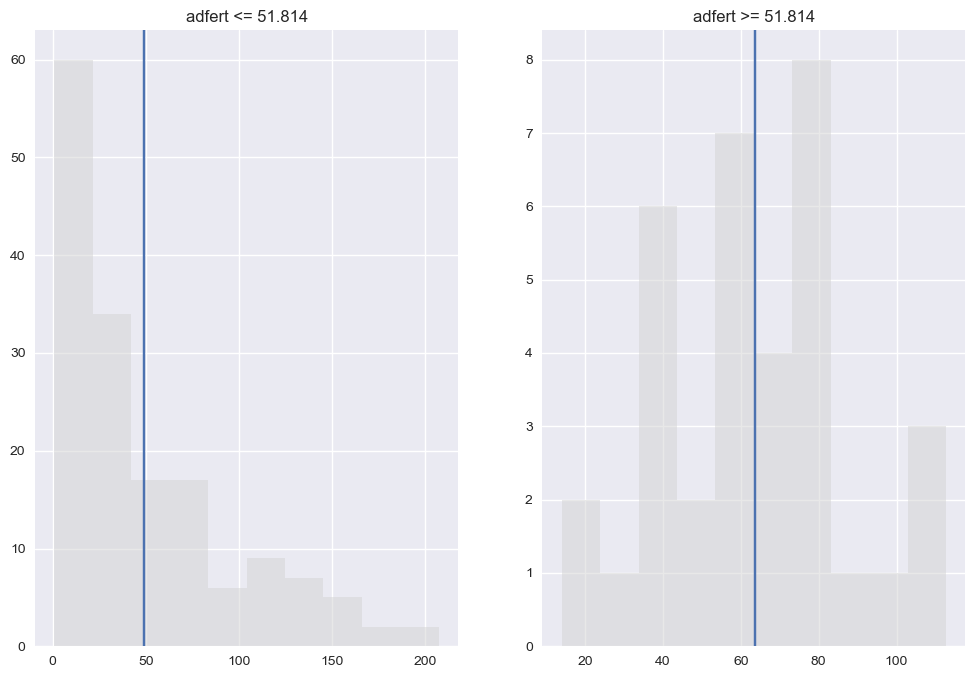


Gráfico de Varibale:  adfert y Continente:  Asia


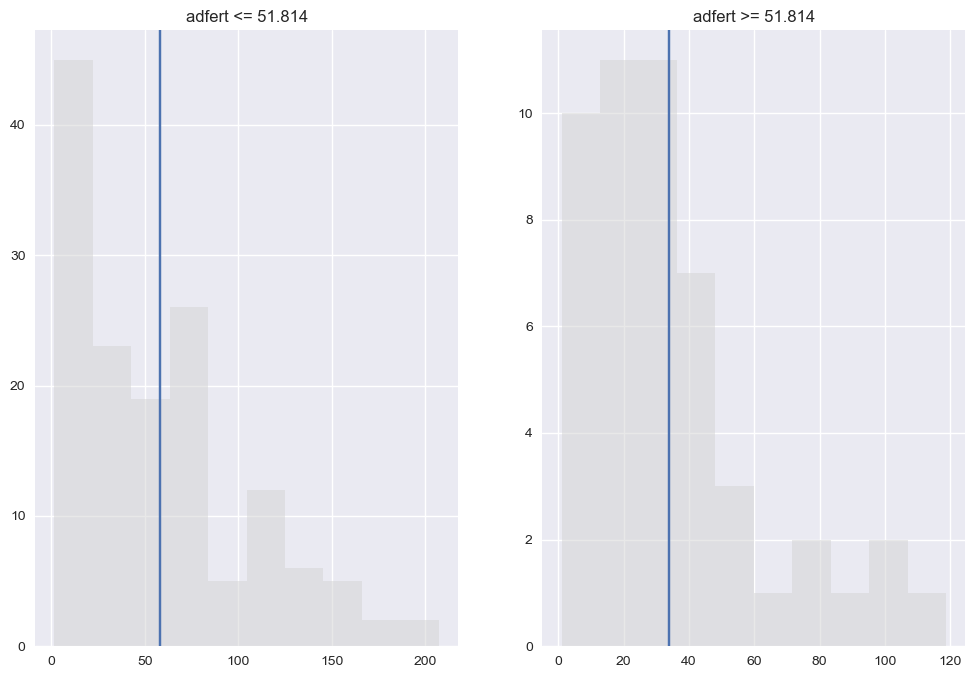


Gráfico de Varibale:  adfert y Continente:  Europe


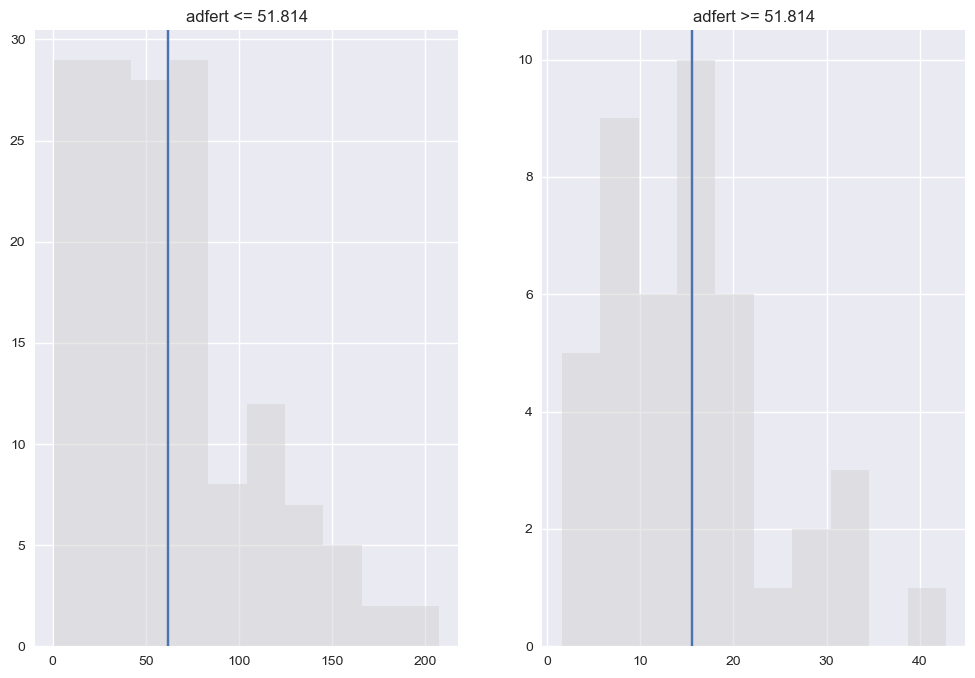


Gráfico de Varibale:  adfert y Continente:  Oceania


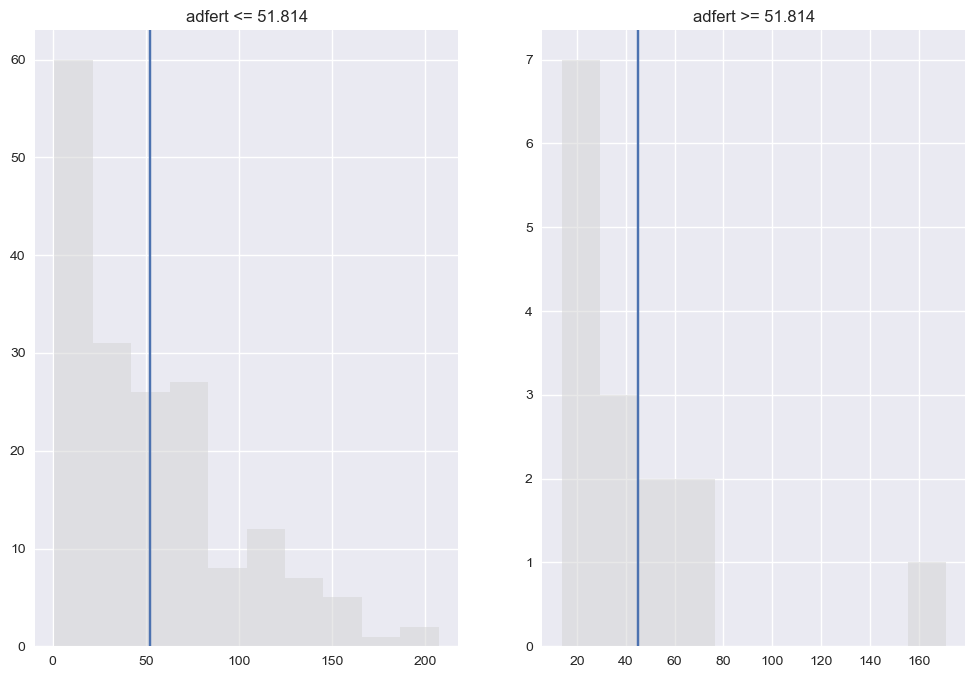


Gráfico de Varibale:  life y Continente:  Africa


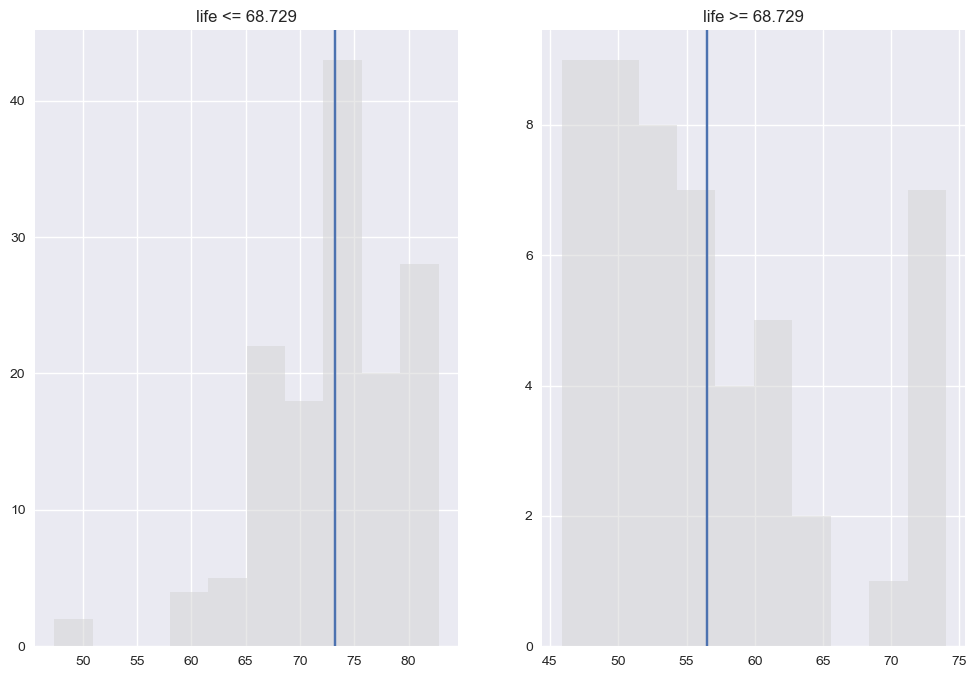


Gráfico de Varibale:  life y Continente:  Americas


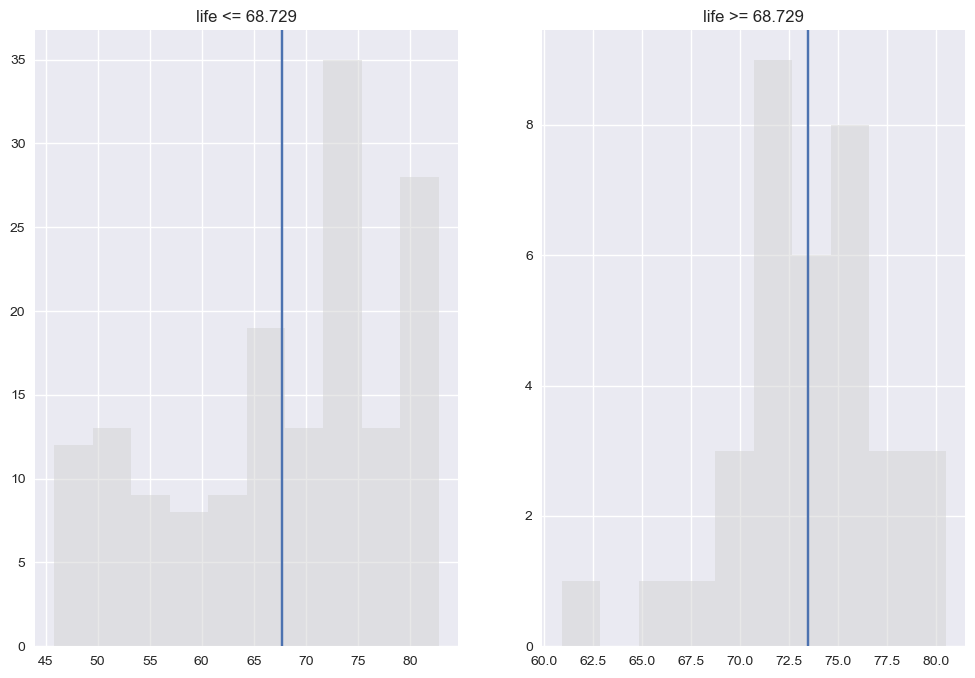


Gráfico de Varibale:  life y Continente:  Asia


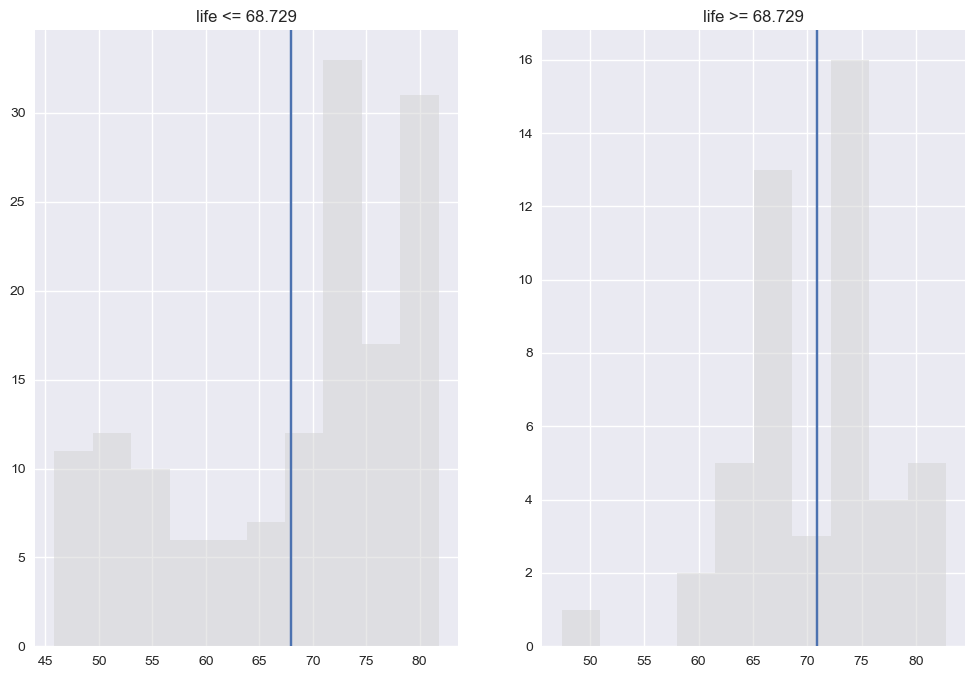


Gráfico de Varibale:  life y Continente:  Europe


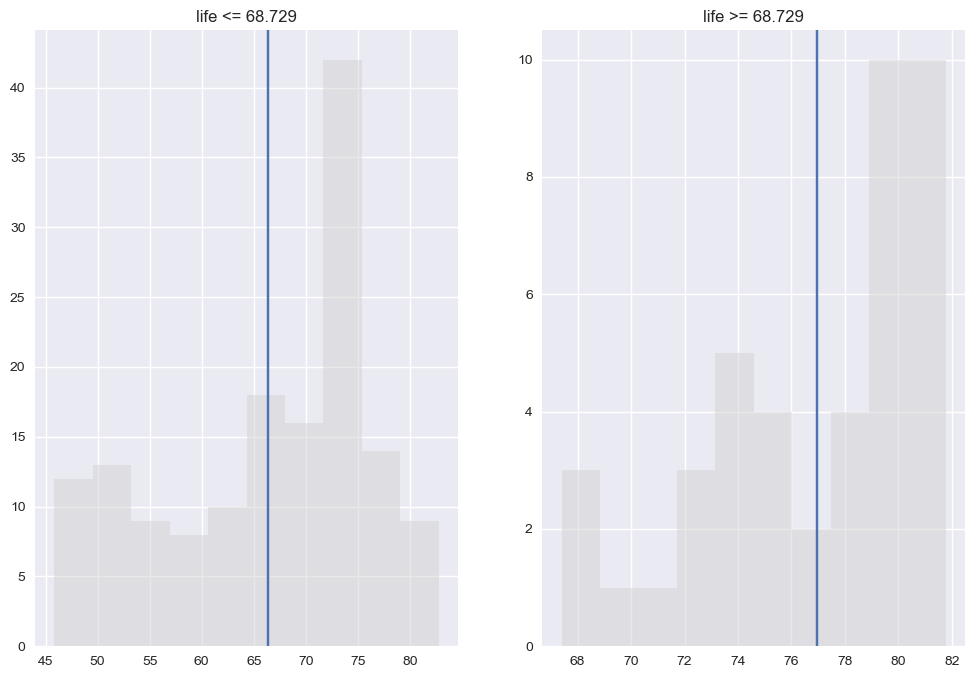


Gráfico de Varibale:  life y Continente:  Oceania


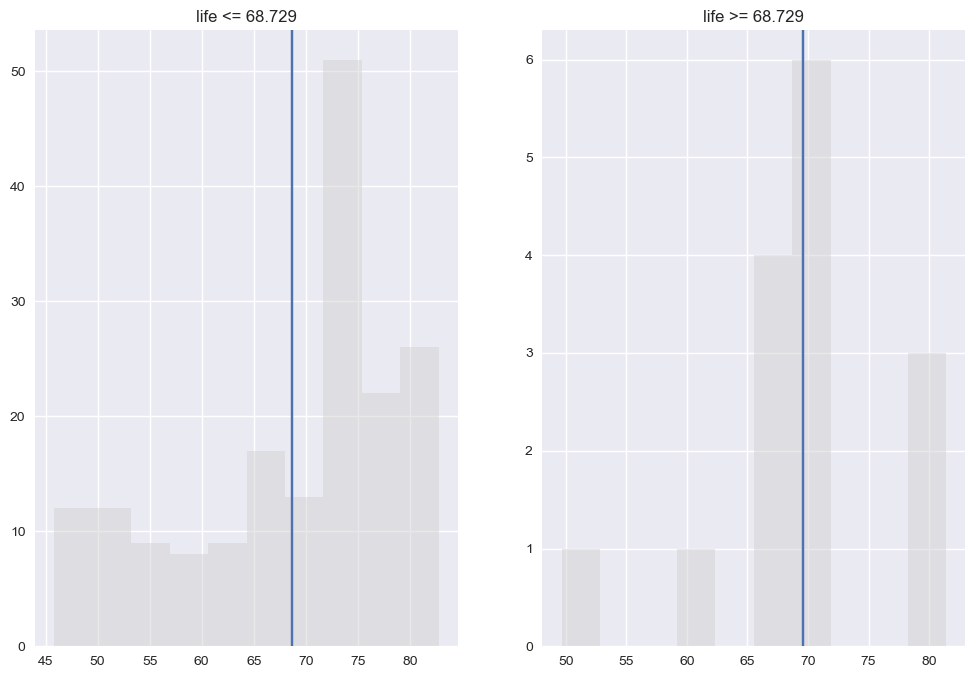

In [52]:
for x in variables_apellido:
    for cont in regiones:
        print("Gráfico de Varibale: ",x,"y Continente: ",cont)
        #ax=plt.subplot()
        
        binarize_histogram_plt(df,x,cont)
        print()

****Intente realizar una doble iteración para obtener el gráfico por variable y continente, pero este se dibuja sobre el mismo. Por esta razón y con fin de cumplir con el desafio realice la itereación de forma manual para obtener los 15 gráficos. Me gustaria poder revisar en la turoria del viernes, para ver la forma de realizarlo de manera mas eficiente***

for x in variables_apellido:
    for cont in regiones:
        print("Gráfico de Varibale: ",x,"y Continente: ",cont)
        binarize_histogram_plt(df,x,cont)
        print()

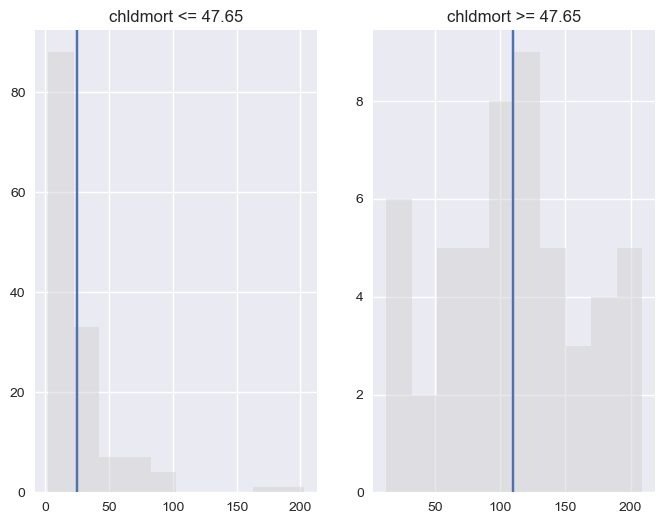

In [11]:
binarize_histogram_plt(df,'chldmort','Africa')

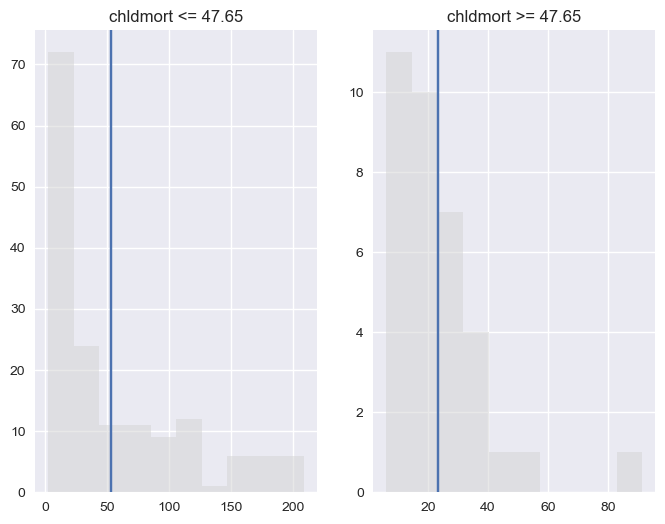

In [12]:
binarize_histogram_plt(df,'chldmort','Americas')

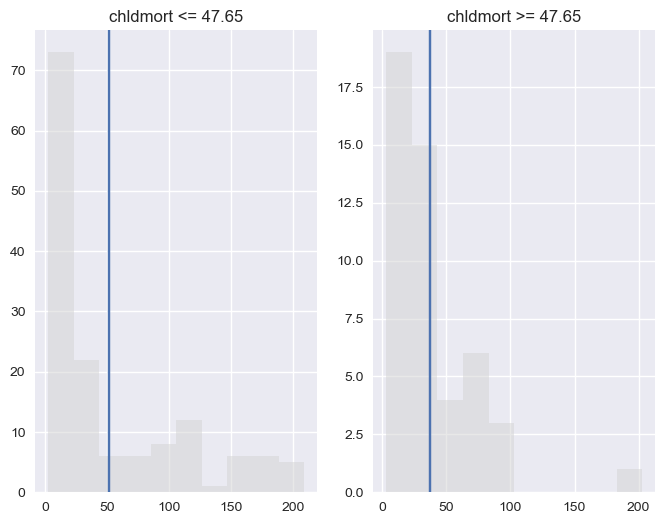

In [13]:
binarize_histogram_plt(df,'chldmort','Asia')

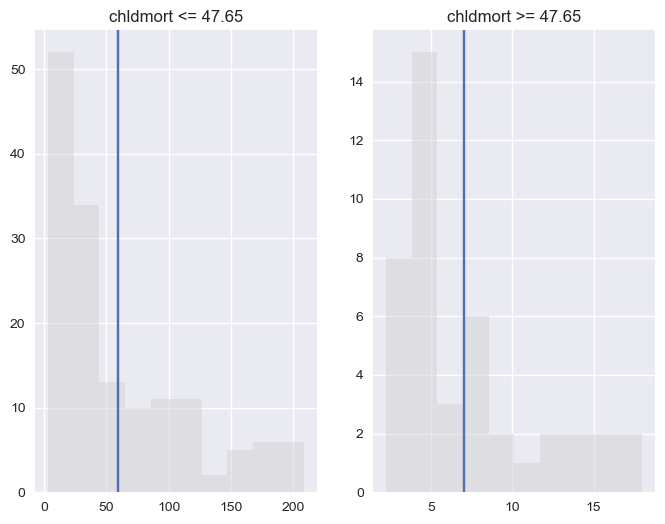

In [14]:
binarize_histogram_plt(df,'chldmort','Europe')

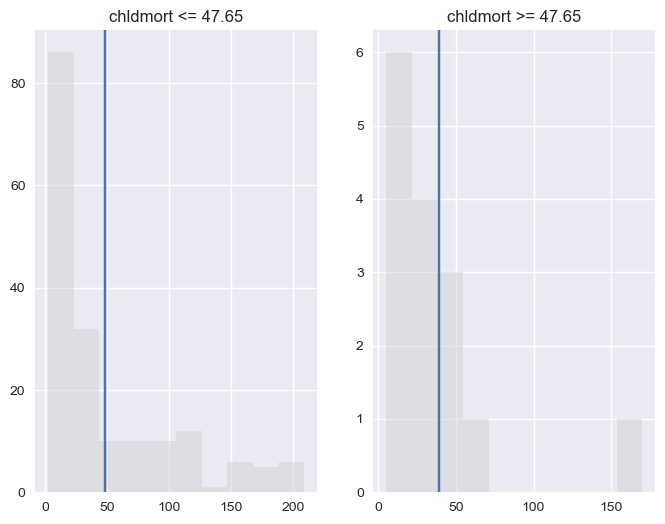

In [15]:
binarize_histogram_plt(df,'chldmort','Oceania')

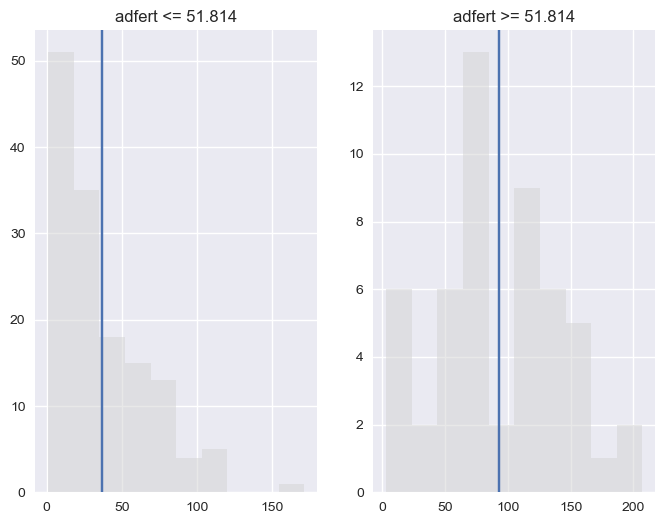

In [16]:
binarize_histogram_plt(df,'adfert','Africa')

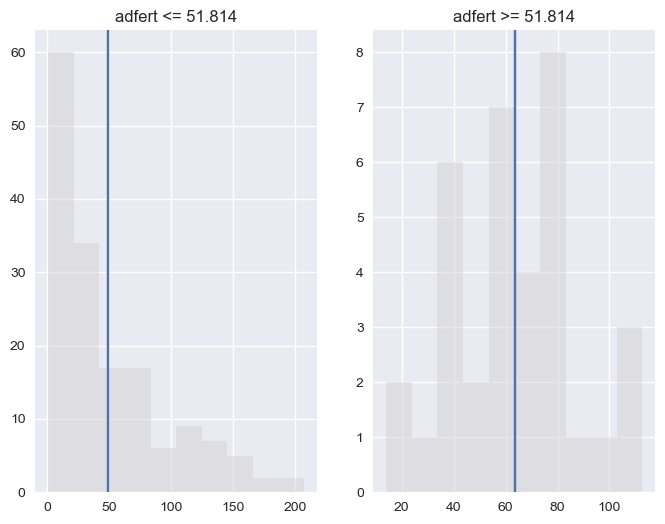

In [17]:
binarize_histogram_plt(df,'adfert','Americas')

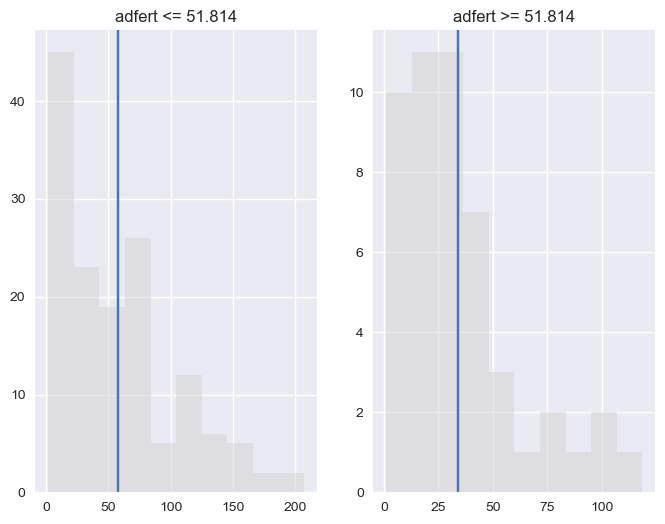

In [18]:
binarize_histogram_plt(df,'adfert','Asia')

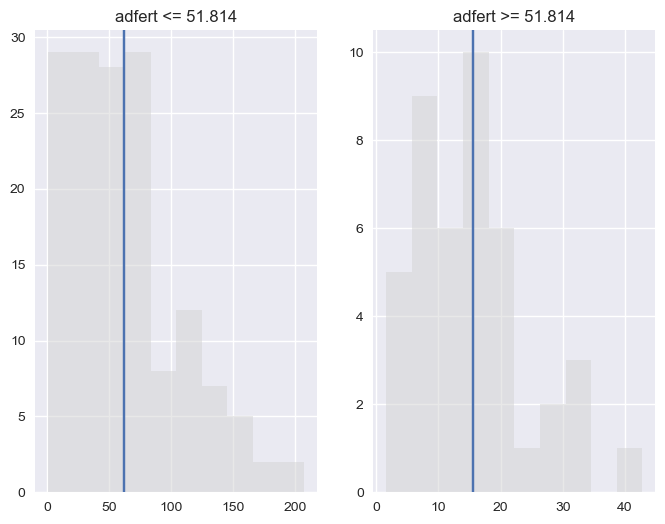

In [19]:
binarize_histogram_plt(df,'adfert','Europe')

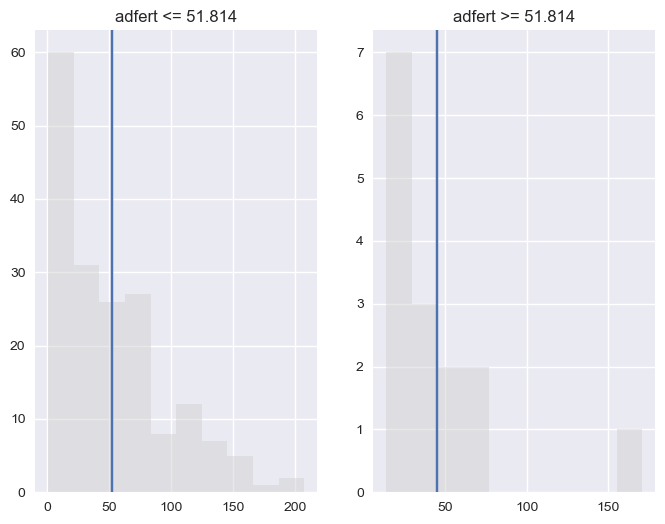

In [20]:
binarize_histogram_plt(df,'adfert','Oceania')

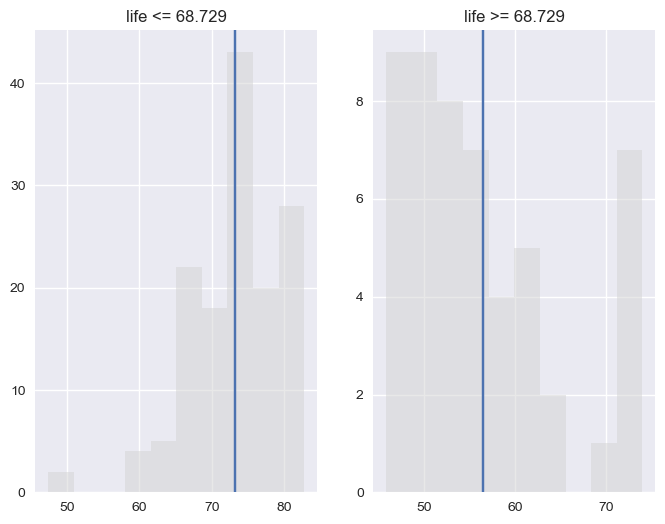

In [21]:
binarize_histogram_plt(df,'life','Africa')

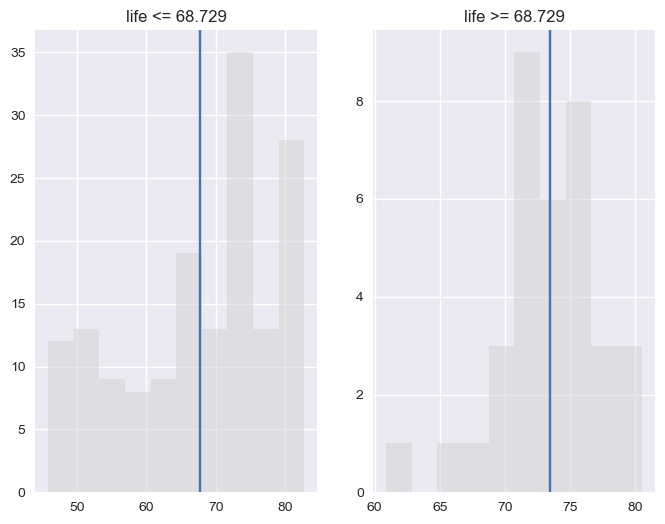

In [22]:
binarize_histogram_plt(df,'life','Americas')

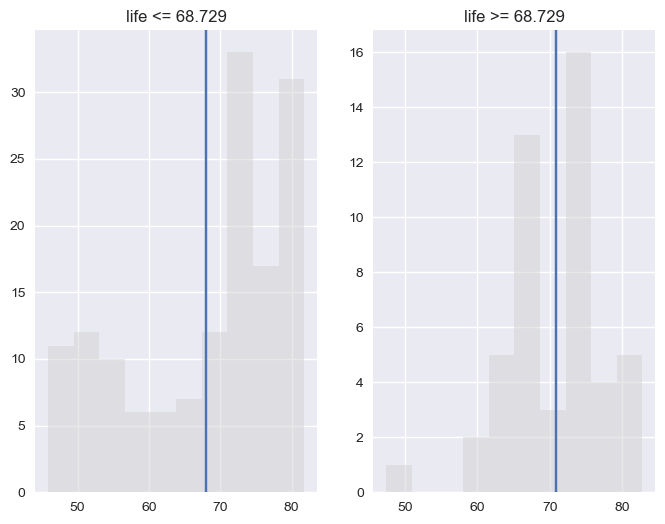

In [23]:
binarize_histogram_plt(df,'life','Asia')

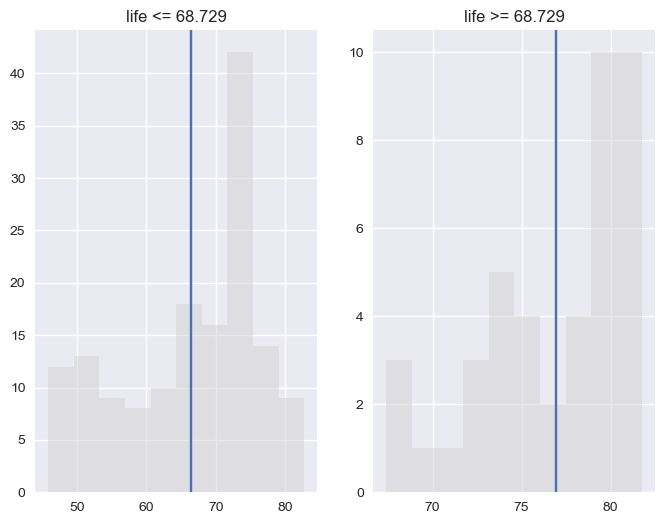

In [24]:
binarize_histogram_plt(df,'life','Europe')

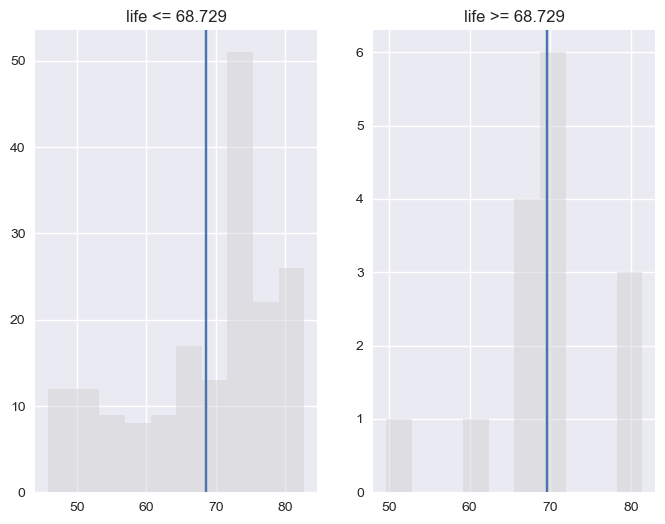

In [25]:
binarize_histogram_plt(df,'life','Oceania')